In [1]:
#Air Pollution is Rising!
#Predicting Pollution Levels using Machine Learning

#It is winter time in Delhi so Cody decided to go for a walk to the news stand and on reaching was surprised to see the air quality index of Delhi in the newspaper .
#So he decided to collect the air samples of different locations and then took these samples to his lab where he extracted five features of the air 
#he collected which can be used to predict the air quality index and combined it with the air quality index given in the newspapers. 
#You are provided with the data collected by Cody and your job is to design a machine learning model which given the features extracted by Cody can predict air quality. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\abhin\Downloads\Train(1)\Train.csv")

In [4]:
df.shape

(1600, 6)

In [5]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [6]:
print(df.describe())

         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      0.004114    -0.027604    -0.044459    -0.042408     0.012005   
std       0.997338     1.021776     1.011768     1.017189     0.978654   
min      -3.380125    -3.314844    -3.153118    -3.250169    -2.851707   
25%      -0.647165    -0.705030    -0.706385    -0.709504    -0.615880   
50%      -0.000360    -0.043769    -0.041272    -0.029756    -0.013527   
75%       0.682118     0.645442     0.639130     0.646290     0.650089   
max       3.287205     3.438895     3.216176     2.985410     3.321770   

            target  
count  1600.000000  
mean      0.318835  
std     110.741562  
min    -379.829794  
25%     -71.897040  
50%      -0.610665  
75%      71.226603  
max     337.643014  


In [7]:
print(df.isnull().sum())

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64


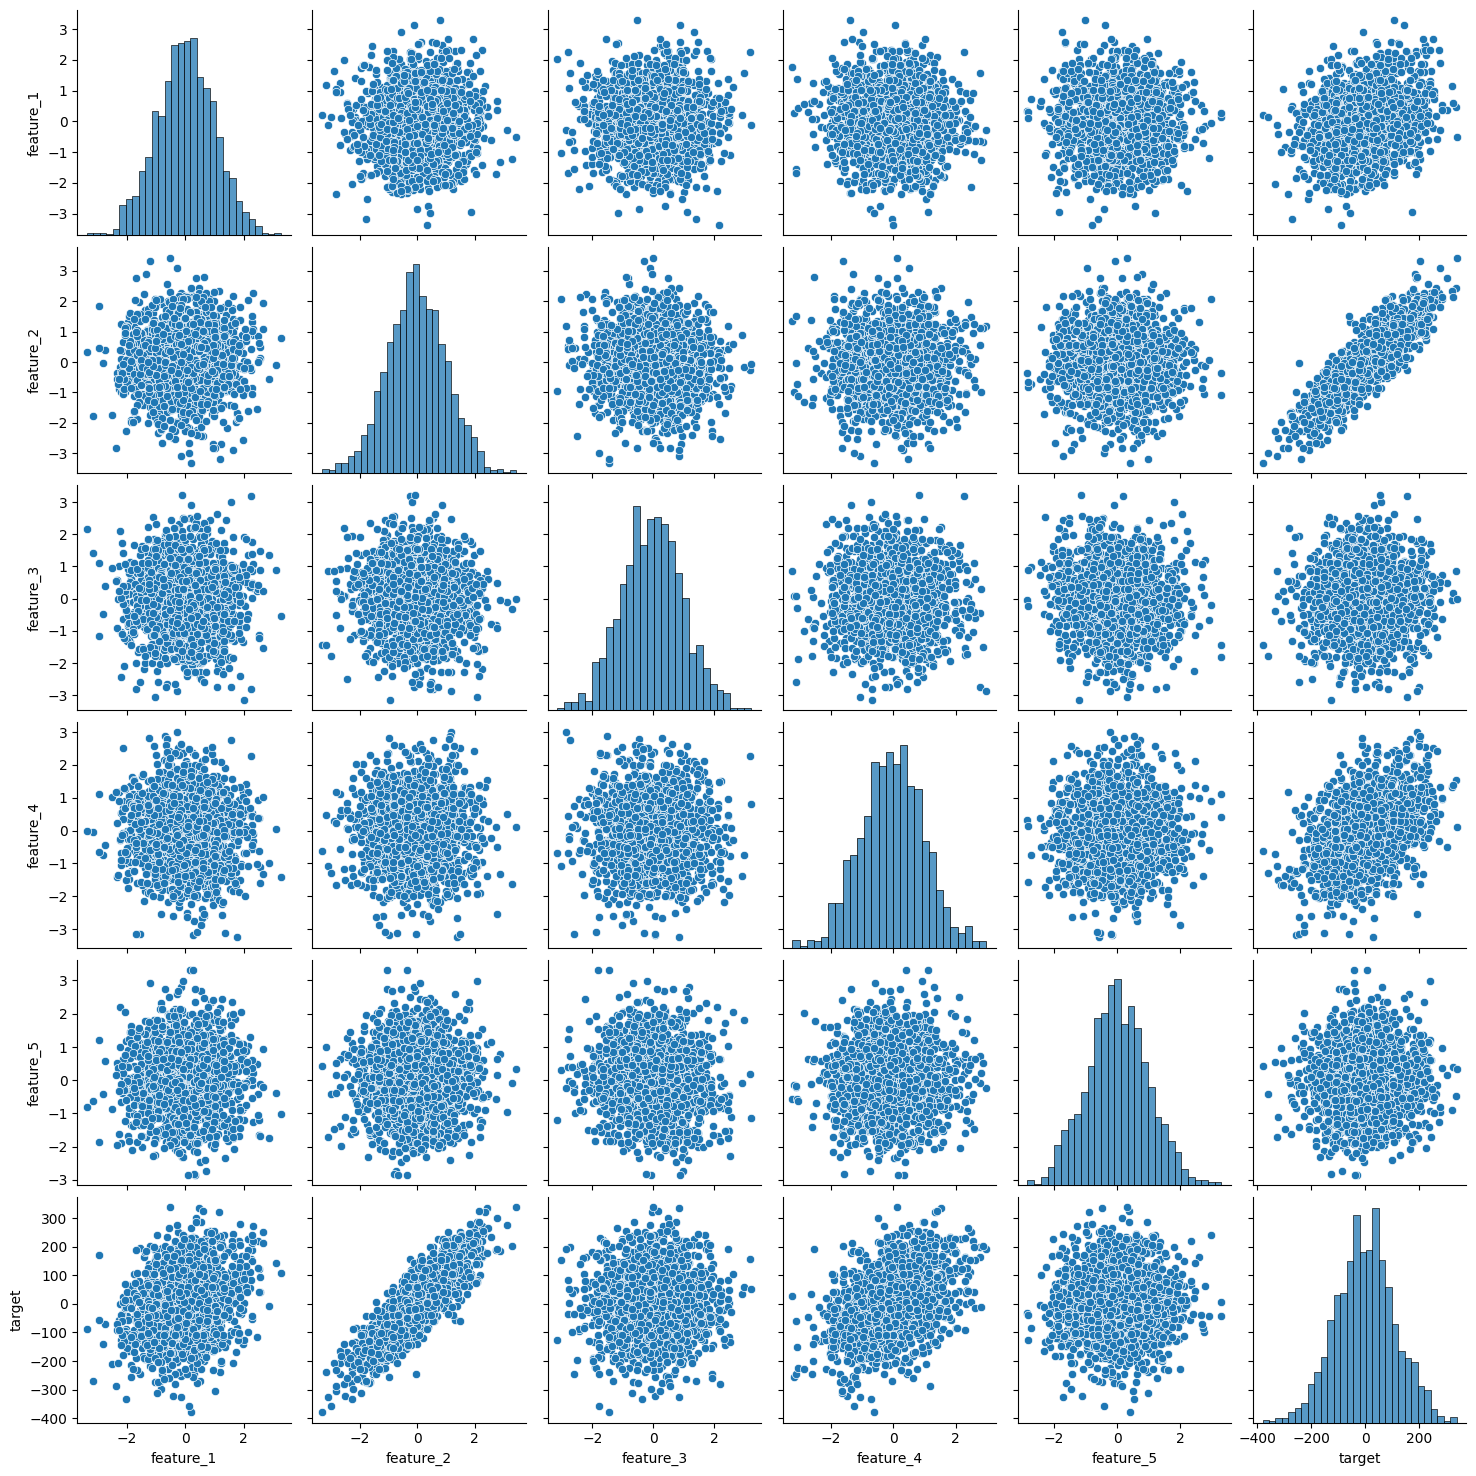

In [8]:
sns.pairplot(df)
plt.show()

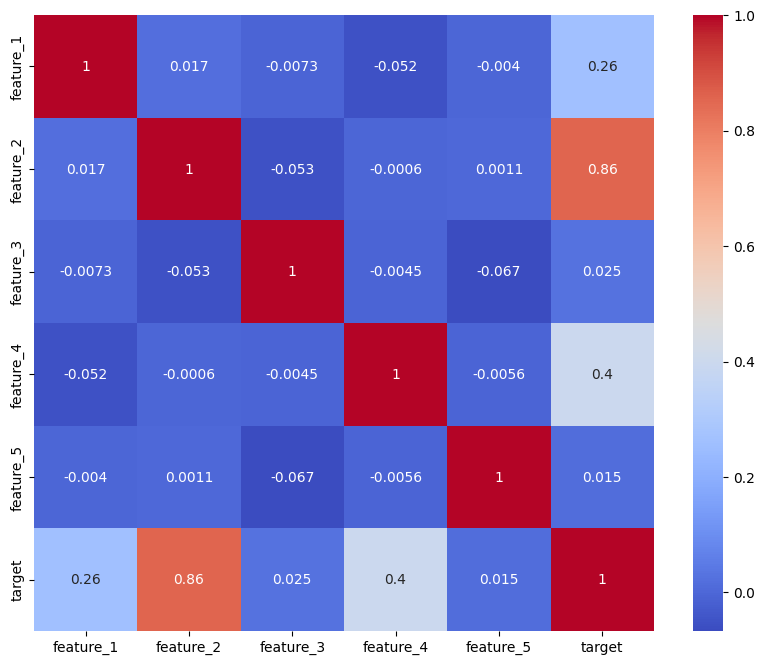

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [10]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 416.2765122401341
R^2 Score: 0.9645254780331751


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Replace with your model
from sklearn.preprocessing import StandardScaler

# Load the training data
train_df = pd.read_csv("C:\\Users\\abhin\\Downloads\\Train(1)\\Train.csv")

# Split into features and target
X = train_df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']]
y = train_df['target']

# Standardize features (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()  # Replace with your actual model
model.fit(X_train, y_train)

# Save the model (optional)
import joblib
joblib.dump(model, 'path_to_your_model.pkl')


['path_to_your_model.pkl']

In [17]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Paths to your files
test_file_path = "C:\\Users\\abhin\\Downloads\\Test(2)\\Test.csv"
sample_submission_path = "C:\\Users\\abhin\\Downloads\\Test(2)\\Sample_Submission.csv"
model_file_path = 'path_to_your_model.pkl'

# Load the test data
test_df = pd.read_csv(test_file_path)

# Load the sample submission file
sample_submission = pd.read_csv(sample_submission_path)

# Load the pre-trained model
model = joblib.load(model_file_path)

# Ensure the scaler used for training is the same
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(test_df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']])

# Make predictions
predictions = model.predict(X_test_scaled)

# Prepare the submission file
submission_df = sample_submission.copy()
submission_df['target'] = predictions

# Save the submission file
submission_file_path = "C:\\Users\\abhin\\Downloads\\Test(2)\\submission.csv"
submission_df.to_csv(submission_file_path, index=False)

print("Submission file has been created successfully.")


Submission file has been created successfully.
